In [1]:
#exploratory data analysis in Quantum
import pandas as pd

In [7]:
transactionData = pd.read_excel('Downloads/QVI_transaction_data.xlsx')

In [3]:
transactionData.head(3)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9


In [4]:
len(transactionData)

264836

In [8]:
customerData = pd.read_csv('Downloads/QVI_purchase_behaviour.csv')

In [13]:
transactionData.head(3)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9


In [12]:
customerData.head(3)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget


In [14]:
#convert datae column in transaction data from integer format to date format
transactionData['DATE'] = pd.to_datetime(transactionData['DATE'], unit='D', origin='1899-12-30')

In [15]:
transactionData.head(2)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3


In [17]:
summary = transactionData['PROD_NAME'].describe()

In [18]:
summary

count                                     264836
unique                                       114
top       Kettle Mozzarella   Basil & Pesto 175g
freq                                        3304
Name: PROD_NAME, dtype: object

In [23]:
# Splitting and unlisting the unique words from the 'PROD_NAME' column
productWords = transactionData['PROD_NAME'].str.split(expand=True).stack().reset_index(level=1, drop=True)

In [24]:
transactionData.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [26]:
print(productWords.head(10))

0        Natural
0           Chip
0         Compny
0    SeaSalt175g
1            CCs
1          Nacho
1         Cheese
1           175g
2         Smiths
2        Crinkle
dtype: object


In [27]:
#we are only interested in words that will tell us if the product is chips or
#not, let's remove all words with digits and special characters such as '&' from our
#set of product words.

productWords = productWords[~productWords.str.contains(r'[\d&]')]

In [28]:
productWords

0          Natural
0             Chip
0           Compny
1              CCs
1            Nacho
            ...   
264834    Jalapeno
264835    Tostitos
264835      Splash
264835          Of
264835        Lime
Length: 1014946, dtype: object

In [30]:
#find the most common words that occured
productWords.value_counts().sort_values(ascending=True)

Fries       1418
Garden      1419
NCC         1419
Pc          1431
Whlegrn     1432
           ...  
Cheese     27890
Salt       27976
Smiths     28860
Kettle     41288
Chips      49770
Length: 171, dtype: int64

In [31]:
#remove salsa products

# Mark and remove rows with "salsa" in 'PROD_NAME' column

transactionData['SALSA'] = transactionData['PROD_NAME'].str.lower().str.contains('salsa')


In [34]:
transactionData['SALSA'].head(2)

0    False
1    False
Name: SALSA, dtype: bool

In [37]:
transactionData = transactionData[~transactionData['SALSA']]

In [38]:
#drop the temp transactionData['SALSA'] column

transactionData = transactionData.drop(columns=['SALSA'])

In [42]:
transactionData.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
7,2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6
8,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9
9,2018-08-18,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2
10,2019-05-17,7,7215,7176,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7


In [43]:
#print col names
tran_col(transactionData.columns)

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES'],
      dtype='object')


In [45]:
print(transactionData['DATE'].describe())
print(transactionData['STORE_NBR'].describe())
print(transactionData['LYLTY_CARD_NBR'].describe())
print(transactionData['TXN_ID'].describe())
print(transactionData['PROD_NBR'].describe())
print(transactionData['PROD_NAME'].describe())
print(transactionData['PROD_QTY'].describe())
print(transactionData['TOT_SALES'].describe())

<ipython-input-45-4614cf45f427>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(transactionData['DATE'].describe())


count                  246742
unique                    364
top       2018-12-24 00:00:00
freq                      865
first     2018-07-01 00:00:00
last      2019-06-30 00:00:00
Name: DATE, dtype: object
count    246742.000000
mean        135.051098
std          76.787096
min           1.000000
25%          70.000000
50%         130.000000
75%         203.000000
max         272.000000
Name: STORE_NBR, dtype: float64
count    2.467420e+05
mean     1.355310e+05
std      8.071528e+04
min      1.000000e+03
25%      7.001500e+04
50%      1.303670e+05
75%      2.030840e+05
max      2.373711e+06
Name: LYLTY_CARD_NBR, dtype: float64
count    2.467420e+05
mean     1.351311e+05
std      7.814772e+04
min      1.000000e+00
25%      6.756925e+04
50%      1.351830e+05
75%      2.026538e+05
max      2.415841e+06
Name: TXN_ID, dtype: float64
count    246742.000000
mean         56.351789
std          33.695428
min           1.000000
25%          26.000000
50%          53.000000
75%          87.000000

In [48]:
#check for na values
na_values = transactionData.isna().any()
print(na_values)

DATE              False
STORE_NBR         False
LYLTY_CARD_NBR    False
TXN_ID            False
PROD_NBR          False
PROD_NAME         False
PROD_QTY          False
TOT_SALES         False
dtype: bool


In [49]:
#check for outliers
summary_stats = transactionData.describe()

In [50]:
summary_stats

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322
std,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000
50%,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [52]:
#### Filter the dataset to find the outlier

outlier_rows = transactionData[transactionData['PROD_QTY'] == 200]

outlier_rows

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [54]:
#### Let's see if the customer has had other transactions
customer1 = transactionData[transactionData['LYLTY_CARD_NBR'] == 226000]
customer1

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [57]:
#### Filter out the customer based on the loyalty card number
transactionData.drop(transactionData[transactionData['LYLTY_CARD_NBR']  == 226000].index, inplace=True)

In [58]:
transactionData.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246740.000000,2.467400e+05,2.467400e+05,246740.000000,246740.000000,246740.000000
mean,135.050361,1.355303e+05,1.351304e+05,56.352213,1.906456,7.316113
std,76.786971,8.071520e+04,7.814760e+04,33.695235,0.342499,2.474897
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.001500e+04,6.756875e+04,26.000000,2.000000,5.800000
50%,130.000000,1.303670e+05,1.351815e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030832e+05,2.026522e+05,87.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000


In [60]:
#That's better. Now, let's look at the number of transaction lines over time to see
#if there are any obvious data issues such as missing data.

#### Count the number of transactions by date
counts_date = transactionData['DATE'].value_counts().sort_index()
counts_date

2018-07-01    663
2018-07-02    650
2018-07-03    674
2018-07-04    669
2018-07-05    660
             ... 
2019-06-26    657
2019-06-27    669
2019-06-28    673
2019-06-29    703
2019-06-30    704
Name: DATE, Length: 364, dtype: int64

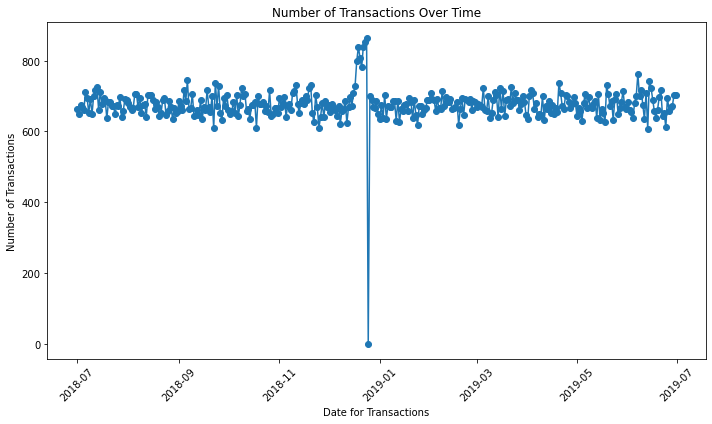

In [63]:
#days are 365 but there are only 364 dates which indicates a missing date
#Let's create a sequence of dates from 1 Jul 2018 to 30 Jun 2019 and use this to create a
#chart of number of transactions over time to find the missing date.

import matplotlib.pyplot as plt
import datetime as dt

start_date = dt.date(2018, 7, 1)
end_date = dt.date(2019, 6, 30)
date_range = pd.date_range(start_date, end_date, freq='D')

#group the data by date and count the transactions
## Reindex to include missing dates and fill missing values with 0
counts_date = transactionData['DATE'].value_counts()
counts_date

counts_date = counts_date.reindex(date_range, fill_value=0)

# Create a line chart to visualize the transaction counts over time
plt.figure(figsize=(10,6))
plt.plot(counts_date.index, counts_date.values, marker='o')
plt.xlabel('Date for Transactions')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

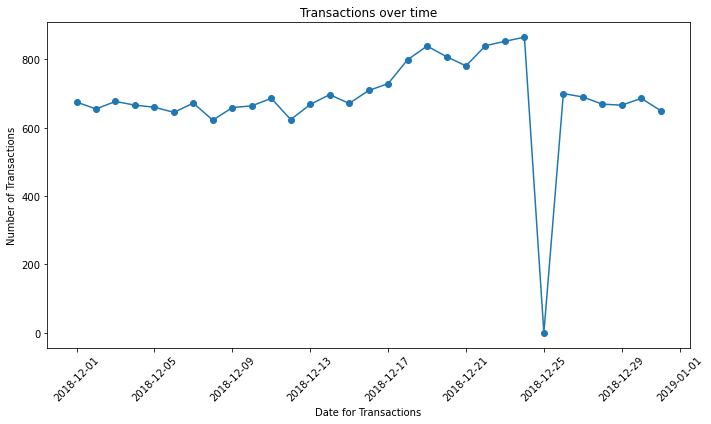

In [67]:
#We can see that there is an increase in purchases in December and a break in late December.
#fiilter december 

# Convert 'DATE' column to datetime if not already done
transactionData['DATE'] = pd.to_datetime(transactionData['DATE'])

#filter the month of december
december = transactionData[(transactionData['DATE'].dt.month == 12)]

start_date = dt.date(2018, 12, 1)
end_date = dt.date(2018, 12, 31)
date_range = pd.date_range(start_date, end_date, freq='D')

# Group data by date and count transactions for December
counts_date = counts_date.reindex(date_range, fill_value=0)

# Create a line chart to visualize the transaction counts over time using matplotlib
plt.figure(figsize=(10, 6))
plt.plot(counts_date.index, counts_date.values, marker='o')
plt.xlabel('Date for Transactions')
plt.ylabel('Number of Transactions')
plt.title('Transactions over time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [76]:
#We can see that the increase in sales occurs in the lead-up to Christmas and that
#there are zero sales on Christmas day itself. This is due to shops being closed onChristmas day.

#since data has no outliers or missing data we can move on to
#creating other features such as brand of chips or pack size from PROD_NAME. We willstart with pack size.

# Extract pack size from each prod name using regular expression
transactionData['PACK_SIZE'] = transactionData['PROD_NAME'].str.extract('(\d+)')
                                               
# Convert the extracted pack size coulmn to numeric values
transactionData['PACK_SIZE'] = pd.to_numeric(transactionData['PACK_SIZE'])
                                               
transactionData['PACK_SIZE'].sort_values(ascending=True)                          

40783      70
42461      70
176183     70
227309     70
42418      70
         ... 
192034    380
255797    380
233814    380
131573    380
102409    380
Name: PACK_SIZE, Length: 246740, dtype: int64

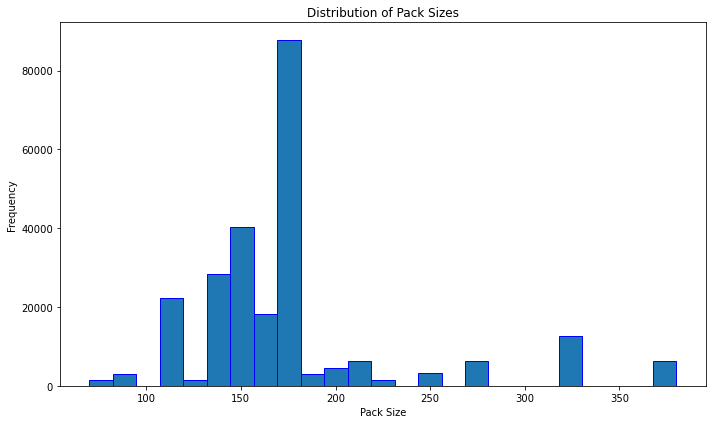

In [77]:
# Let's plot a histogram of PACK_SIZE since we know that it represents the package size, it's usually treated as a continuous variable, not a categorical one.
plt.figure(figsize=(10, 6))
plt.hist(transactionData['PACK_SIZE'], bins=25, edgecolor='blue')
plt.xlabel('Pack Size')
plt.ylabel('Frequency')
plt.title('Distribution of Pack Sizes')
plt.tight_layout()
plt.show()

In [87]:
# Extract the brand names from PROD_NAME

transactionData['BRANDS'] = transactionData['PROD_NAME'].str.split().str[0]

transactionData['BRANDS'].head(30)

0      Natural
1          CCs
2       Smiths
3       Smiths
4       Kettle
6       Smiths
7        Grain
8      Doritos
9        Grain
10      Smiths
11      Kettle
12    Twisties
13          WW
14       Thins
15         CCs
16      Burger
17         NCC
18     Doritos
19    Cheezels
20      Smiths
21         NCC
22      Infzns
23      Kettle
24      Kettle
26      Smiths
27      Kettle
28         Red
29      Infzns
30    Pringles
31    Pringles
Name: BRANDS, dtype: object

In [90]:
#Some of the brand names look like they are of the same brands - such as RED and
#RRD, which are both Red Rock Deli chips. Let's combine these together.

# Replace "RED" with "RRD" in the 'BRAND' column
transactionData.loc[transactionData['BRANDS'] == 'Red', 'BRANDS'] = 'RRD'

transactionData['BRANDS'].head(30)


0      Natural
1          CCs
2       Smiths
3       Smiths
4       Kettle
6       Smiths
7        Grain
8      Doritos
9        Grain
10      Smiths
11      Kettle
12    Twisties
13          WW
14       Thins
15         CCs
16      Burger
17         NCC
18     Doritos
19    Cheezels
20      Smiths
21         NCC
22      Infzns
23      Kettle
24      Kettle
26      Smiths
27      Kettle
28         RRD
29      Infzns
30    Pringles
31    Pringles
Name: BRANDS, dtype: object

In [96]:
# further checks where done on CC for Corn Chips, WW for Weight Watchers and NCC for Natural Chips Co
checks = transactionData.loc[transactionData['BRANDS'] == 'Natural']
checks

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRANDS
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural
40,2019-05-14,55,55072,48883,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,Natural
75,2018-08-18,101,101170,101017,12,Natural Chip Co Tmato Hrb&Spce 175g,1,3.0,175,Natural
214,2018-07-30,1,1411,475,12,Natural Chip Co Tmato Hrb&Spce 175g,1,3.0,175,Natural
234,2019-04-08,2,2481,1092,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,Natural
...,...,...,...,...,...,...,...,...,...,...
264716,2018-09-29,266,266230,264055,12,Natural Chip Co Tmato Hrb&Spce 175g,1,3.0,175,Natural
264723,2018-12-05,266,266364,264204,80,Natural ChipCo Sea Salt & Vinegr 175g,2,6.0,175,Natural
264750,2019-06-03,268,268270,264690,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural
264792,2019-03-31,270,270032,266816,12,Natural Chip Co Tmato Hrb&Spce 175g,2,6.0,175,Natural


In [100]:
# Replace "Natural" with "NCC" in the 'BRANDS' column
transactionData.loc[transactionData['BRANDS'] == 'Natural', 'BRANDS'] = 'NCC'

transactionData['BRANDS'].head(50)

0           NCC
1           CCs
2        Smiths
3        Smiths
4        Kettle
6        Smiths
7         Grain
8       Doritos
9         Grain
10       Smiths
11       Kettle
12     Twisties
13           WW
14        Thins
15          CCs
16       Burger
17          NCC
18      Doritos
19     Cheezels
20       Smiths
21          NCC
22       Infzns
23       Kettle
24       Kettle
26       Smiths
27       Kettle
28          RRD
29       Infzns
30     Pringles
31     Pringles
33        Thins
34          RRD
35       Smiths
36       Kettle
37      Doritos
38        Thins
39       Smiths
40          NCC
41       Dorito
42     Twisties
43       Smiths
45       Kettle
46       Infzns
47    Infuzions
48       Smiths
49       Kettle
50        Smith
51       Kettle
52        Thins
53       Smiths
Name: BRANDS, dtype: object

In [102]:
customerData.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [104]:
# Examining customer data with basic summaries of dataset
summary_stats = customerData.describe()
summary_stats

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


In [107]:
lifestage_counts = customerData['LIFESTAGE'].value_counts()
premium_customer_counts = customerData['PREMIUM_CUSTOMER'].value_counts()

print(lifestage_counts)
print(premium_customer_counts)

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64
Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64


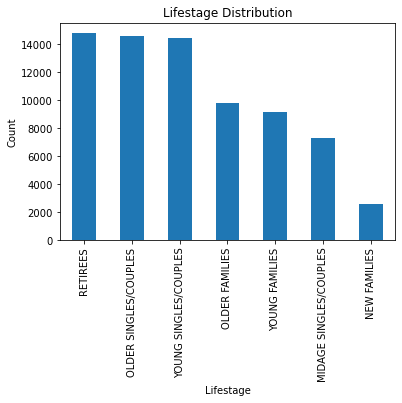

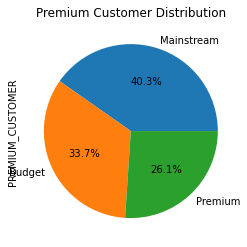

In [108]:
#basic plots for categorical data
lifestage_counts.plot(kind='bar', title='Lifestage Distribution')
plt.xlabel('Lifestage')
plt.ylabel('Count')
plt.show()

premium_customer_counts.plot(kind='pie',  autopct='%1.1f%%', title='Premium Customer Distribution')
plt.ylabel=''
plt.show()

In [109]:
# Check for missing values in both columns using .isna() and .sum()
missing_lifestage = customerData['LIFESTAGE'].isna().sum()
missing_premium_customer = customerData['PREMIUM_CUSTOMER'].isna().sum()

print(missing_lifestage)
print(missing_premium_customer)
                                 

0
0


In [115]:
#merge both transactionData and customerData ON LYLTY_CARD_NBR
data = pd.merge(transactionData, customerData, how='left', on='LYLTY_CARD_NBR')

data.head(40)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRANDS,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.00,175,NCC,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.30,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.90,170,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.00,175,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.80,150,Kettle,MIDAGE SINGLES/COUPLES,Budget
5,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.70,330,Smiths,MIDAGE SINGLES/COUPLES,Budget
6,2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.60,210,Grain,MIDAGE SINGLES/COUPLES,Budget
7,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.90,150,Doritos,MIDAGE SINGLES/COUPLES,Budget
8,2018-08-18,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.20,210,Grain,MIDAGE SINGLES/COUPLES,Budget
9,2019-05-17,7,7215,7176,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.70,330,Smiths,MIDAGE SINGLES/COUPLES,Budget


In [116]:
#write out the data merged as csv
data.to_csv('Documents/QVI_data.csv', index=False)

In [117]:
# Data analysis on customer segments 
# Who spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behaviour is
# How many customers are in each segment
# How many chips are bought per customer by segment
# What's the average chip price by customer segment

# We could also ask our data team for more information.
# The customer's total spend over the period and total spend for each transaction to understand what proportion of their grocery spend is on chips
# Proportion of customers in each customer segment overall to compare against the mix of customers who purchase chips

In [118]:
# Calculate total sales by LIFESTAGE and PREMIUM_CUSTOMER
merged_data = pd.read_csv('Documents/QVI_data.csv')

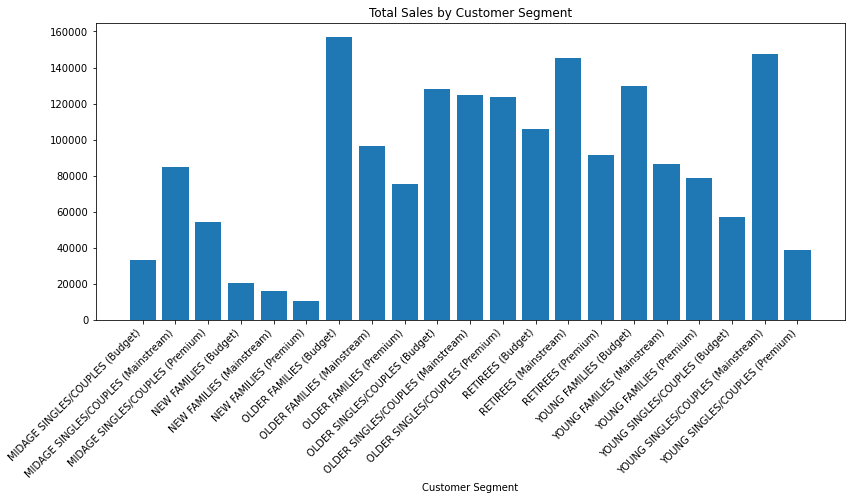

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES
0,MIDAGE SINGLES/COUPLES,Budget,33345.70
1,MIDAGE SINGLES/COUPLES,Mainstream,84734.25
2,MIDAGE SINGLES/COUPLES,Premium,54443.85
3,NEW FAMILIES,Budget,20607.45
4,NEW FAMILIES,Mainstream,15979.70
5,NEW FAMILIES,Premium,10760.80
6,OLDER FAMILIES,Budget,156863.75
7,OLDER FAMILIES,Mainstream,96413.55
8,OLDER FAMILIES,Premium,75242.60
9,OLDER SINGLES/COUPLES,Budget,127833.60


In [137]:
import matplotlib.pyplot as plt

sales_by_segment = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(sales_by_segment['LIFESTAGE'] + ' (' + sales_by_segment['PREMIUM_CUSTOMER'] + ')', sales_by_segment['TOT_SALES'])
plt.xlabel('Customer Segment')
#plt.ylabel('Total Sales')
plt.title('Total Sales by Customer Segment')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Adjust the subplot parameters to make room for the labels
plt.subplots_adjust(bottom=0.25)

plt.show()


sales_by_segment

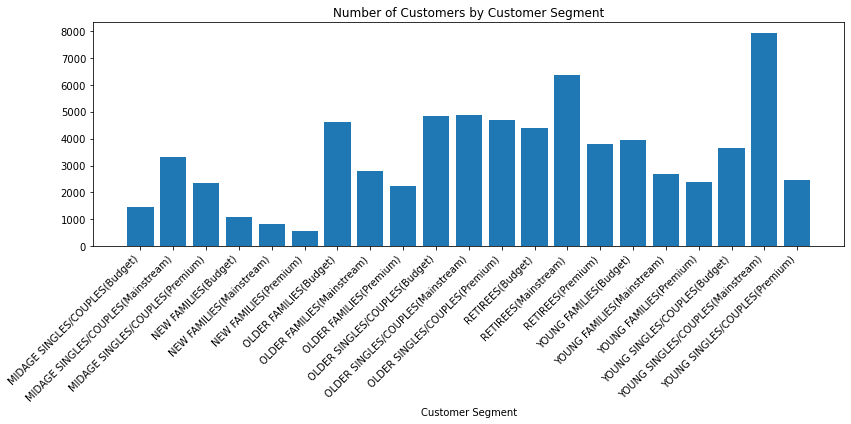

,LIFESTAGE,PREMIUM_CUSTOMER,LYLTY_CARD_NBR
0,MIDAGE SINGLES/COUPLES,Budget,1474
1,MIDAGE SINGLES/COUPLES,Mainstream,3298
2,MIDAGE SINGLES/COUPLES,Premium,2369
3,NEW FAMILIES,Budget,1087
4,NEW FAMILIES,Mainstream,830
5,NEW FAMILIES,Premium,575
6,OLDER FAMILIES,Budget,4611
7,OLDER FAMILIES,Mainstream,2788
8,OLDER FAMILIES,Premium,2231
9,OLDER SINGLES/COUPLES,Budget,4849


In [140]:
customers_by_segment = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().reset_index()

# Create a bar plot to visualize the number of customers by segment
plt.figure(figsize=(12, 6))
plt.bar(customers_by_segment['LIFESTAGE'] + '(' + customers_by_segment['PREMIUM_CUSTOMER'] + ')', customers_by_segment['LYLTY_CARD_NBR'])
plt.xlabel('Customer Segment')
#plt.ylabel('Number of Customers')
plt.title('Number of Customers by Customer Segment')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
customers_by_segment

In [141]:
#the result i.e using the two dimensions of lifestage and premium_customer the highest number
# in the young singles main stream and retireees mainstream. this supports the previous plot that used the same 2 dimensions but showed which group was responsible for high sales.
# in general Older families and young families in general buy more chips per customer

data.head(2)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRANDS,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NCC,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget


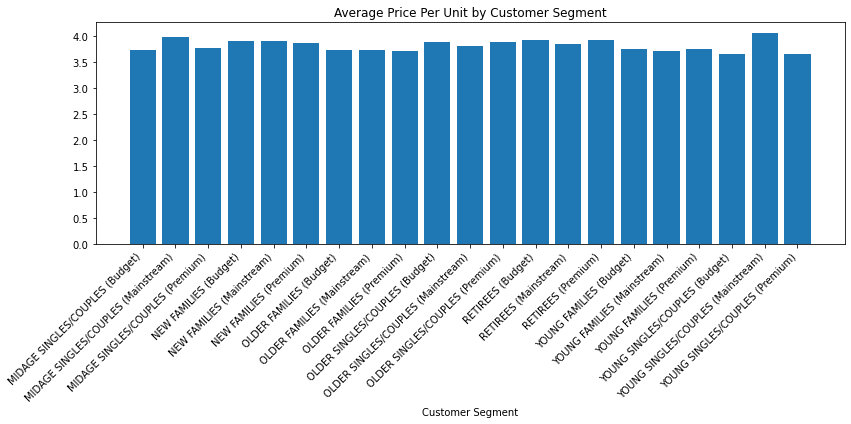

In [143]:
# Calculate the average price per unit by LIFESTAGE and PREMIUM_CUSTOMER bought for each customer
#segment as this is also a driver of total sales.

data['AVG_PRICE'] = data['TOT_SALES'] / data['PROD_QTY']
avg_price_segment = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['AVG_PRICE'].mean().reset_index()

# Create a bar plot to visualize the average price per unit by segment
plt.figure(figsize=(12, 6))
plt.bar(avg_price_segment['LIFESTAGE'] + ' (' + avg_price_segment['PREMIUM_CUSTOMER'] + ')', avg_price_segment['AVG_PRICE'])
plt.xlabel('Customer Segment')
#plt.ylabel('Average price per unit')
plt.title('Average Price Per Unit by Customer Segment')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
                                             

In [144]:
# Mainstream midage and young singles and couples are more willing to pay more per
# packet of chips compared to their budget and premium counterparts. This may be due
# to premium shoppers being more likely to buy healthy snacks and when they buy
# chips, this is mainly for entertainment purposes rather than their own consumption.

In [145]:
from scipy import stats
# differences in average prices are not large so we want to check if there is statistical different

# Filter data for the two customer segments (Mainstream and premium)

mainstream_midage_young = data[data['PREMIUM_CUSTOMER'].isin(['Mainstream', 'Budget']) & data['LIFESTAGE'].isin(['MIDAGE SINGLES/COUPLES', 'YOUNG SINGLES/COUPLES'])]

# Separate data for each segment
mainstream_data = mainstream_midage_young[mainstream_midage_young['PREMIUM_CUSTOMER'] == 'Mainstream']
budget_data = mainstream_midage_young[mainstream_midage_young['PREMIUM_CUSTOMER'] == 'Budget']

# Perform independent t-test

t_stat, p_value = stats.ttest_ind(mainstream_data['AVG_PRICE'], budget_data['AVG_PRICE'])

print(f"T_Statistic: {t_stat}")
print(f"P_Value: {p_value}")

T_Statistic: 32.65243241508603
P_Value: 4.376398131983021e-231
